In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("milk_quality_data.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [6]:
x=df.iloc[ : , : -1]
y=df.iloc[ : , -1 ]
print(x)
print(y)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]
0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_test)
print(y_test)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
418   6.6          37      1     1     1          1     255
202   9.0          43      1     0     1          1     250
682   6.8          45      0     0     0          1     255
316   5.6          50      0     1     1          1     255
267   6.8          45      1     1     1          1     245
...   ...         ...    ...   ...   ...        ...     ...
1021  4.5          38      0     1     1          1     255
527   6.5          38      1     0     1          0     255
985   6.5          45      1     0     0          0     246
966   8.6          55      0     1     1          1     255
113   6.8          45      0     0     0          1     255

[265 rows x 7 columns]
418       high
202        low
682     medium
316        low
267       high
         ...  
1021       low
527     medium
985     medium
966        low
113     medium
Name: Grade, Length: 265, dtype: object


In [8]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
print(x_train)

[[-0.07669946 -0.60866162  0.92708402 ... -1.36996773 -0.95323336
   0.72584779]
 [ 0.54401896  2.01309602 -1.07865089 ... -1.36996773 -0.95323336
   0.72584779]
 [ 0.06123796  0.07105333  0.92708402 ... -1.36996773 -0.95323336
  -1.14837382]
 ...
 [-1.31813632 -0.60866162  0.92708402 ...  0.7299442  -0.95323336
   0.72584779]
 [ 1.64751839 -0.12315094  0.92708402 ...  0.7299442   1.04906106
  -0.44554072]
 [-0.07669946 -0.60866162  0.92708402 ... -1.36996773 -0.95323336
   0.72584779]]


In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='gini',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
plt.show()

['high' 'low' 'medium' 'low' 'high' 'medium' 'low' 'high' 'high' 'medium'
 'low' 'high' 'medium' 'medium' 'high' 'medium' 'high' 'high' 'high' 'low'
 'high' 'low' 'medium' 'high' 'high' 'low' 'high' 'high' 'low' 'medium'
 'high' 'low' 'low' 'medium' 'high' 'high' 'low' 'medium' 'high' 'low'
 'high' 'medium' 'high' 'low' 'medium' 'low' 'high' 'low' 'medium' 'low'
 'high' 'medium' 'medium' 'medium' 'low' 'medium' 'medium' 'low' 'medium'
 'low' 'medium' 'low' 'medium' 'high' 'low' 'medium' 'low' 'medium'
 'medium' 'high' 'high' 'medium' 'medium' 'high' 'medium' 'medium'
 'medium' 'low' 'high' 'medium' 'low' 'medium' 'medium' 'low' 'medium'
 'medium' 'high' 'low' 'low' 'low' 'medium' 'high' 'medium' 'low' 'high'
 'medium' 'low' 'high' 'medium' 'medium' 'high' 'medium' 'low' 'medium'
 'high' 'high' 'high' 'high' 'low' 'low' 'high' 'high' 'high' 'high' 'low'
 'medium' 'low' 'high' 'medium' 'high' 'medium' 'medium' 'low' 'high'
 'high' 'low' 'low' 'low' 'medium' 'high' 'low' 'medium' 'low' 'm

In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[80  0  1]
 [ 0 90  1]
 [ 0  0 93]]


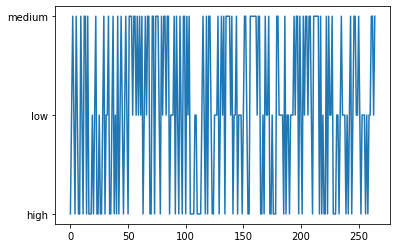

In [11]:
import matplotlib.pyplot as plt
y_pred=classifier.predict(x_test)
plt.plot(y_pred)
plt.show()

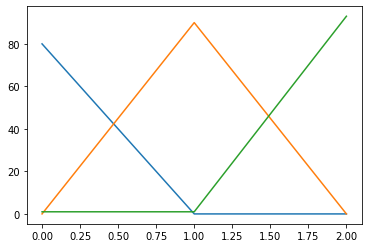

In [12]:
cm=confusion_matrix(y_test,y_pred)
plt.plot(cm)
plt.show()

[Text(0.39945652173913043, 0.9545454545454546, 'X[0] <= 7.1\ngini = 0.653\nsamples = 1059\nvalue = [256, 429, 374]'),
 Text(0.35597826086956524, 0.8636363636363636, 'X[0] <= 6.0\ngini = 0.648\nsamples = 849\nvalue = [256, 219, 374]'),
 Text(0.3125, 0.7727272727272727, 'gini = 0.0\nsamples = 169\nvalue = [0, 169, 0]'),
 Text(0.39945652173913043, 0.7727272727272727, 'X[4] <= 0.5\ngini = 0.55\nsamples = 680\nvalue = [256, 50, 374]'),
 Text(0.13043478260869565, 0.6818181818181818, 'X[1] <= 47.5\ngini = 0.189\nsamples = 257\nvalue = [1, 26, 230]'),
 Text(0.08695652173913043, 0.5909090909090909, 'X[3] <= 0.5\ngini = 0.017\nsamples = 232\nvalue = [1, 1, 230]'),
 Text(0.043478260869565216, 0.5, 'gini = 0.0\nsamples = 188\nvalue = [0, 0, 188]'),
 Text(0.13043478260869565, 0.5, 'X[5] <= 0.5\ngini = 0.088\nsamples = 44\nvalue = [1, 1, 42]'),
 Text(0.08695652173913043, 0.4090909090909091, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]'),
 Text(0.17391304347826086, 0.4090909090909091, 'X[6] <= 251.5

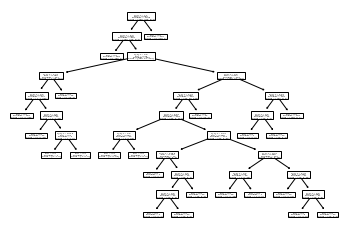

In [16]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x, y)
tree.plot_tree(classifier)